# Sinasodal Model:  Analysis and Synthesis

## Example with audio

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.io import wavfile
import IPython


import spkit as sp

sp.__version__

'0.0.9.4'

## Audio file

In [2]:
path1 = 'https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/piano.wav'
path2 = 'https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing-female.wav'
print(path2)

https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing-female.wav


In [5]:
req = requests.get(path2)
with open('myfile.wav', 'wb') as f:
        f.write(req.content)
        
fs, x = wavfile.read('myfile.wav')
t = np.arange(len(x))/fs

print(x.shape, fs)

(272243,) 44100


In [6]:
mXt,pXt = sp.stft_analysis(x, winlen=441, overlap=220,window='blackmanharris',nfft=None)

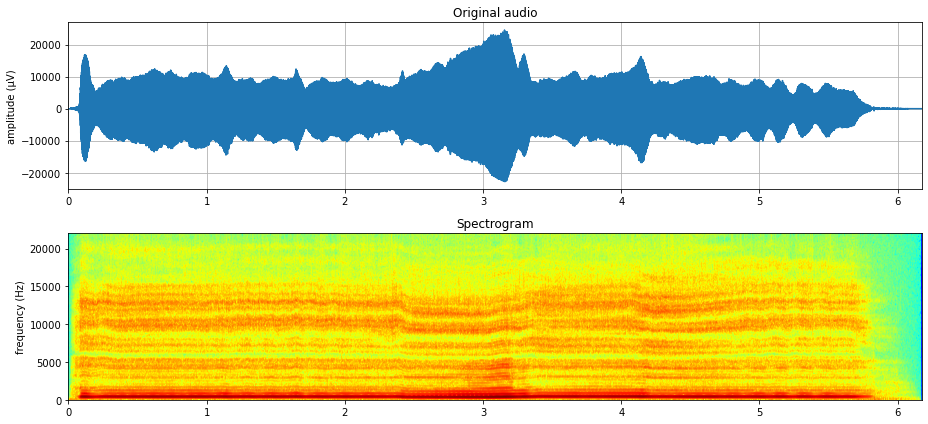

In [7]:
plt.figure(figsize=(13,6))
plt.subplot(211)
plt.plot(t,x)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('Original audio')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')

plt.subplot(212)
plt.imshow(mXt.T,aspect='auto',origin='lower',cmap='jet',extent=[t[0],t[-1],0,fs/2])
plt.title('Spectrogram')
#plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')

plt.tight_layout()
plt.show()

IPython.display.Audio(x,rate=fs)

Original Audio

<audio controls="controls">
      <source src="https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing-female.wav" type="audio/wav"> 
</audio>

https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing-female.wav

## Analysis of Audio with only 20 sinasodals

In [15]:
N = 20

In [17]:
fXst, mXst, pXst = sp.sineModel_analysis(x,fs,winlen=3001,overlap=750,
                            window='blackmanharris', nfft=None, thr=-10, 
                            maxn_sines=N,minDur=0.01, freq_devOffset=10,freq_devSlope=0.1)

print(fXst.shape, mXst.shape, pXst.shape)

(363, 20) (363, 20) (363, 20)


In [9]:
# plotting only frequency which have magnitude > 0dB

In [18]:
fXt1 = (fXst.copy())*(mXst>0)
fXt1[fXt1==0]=np.nan

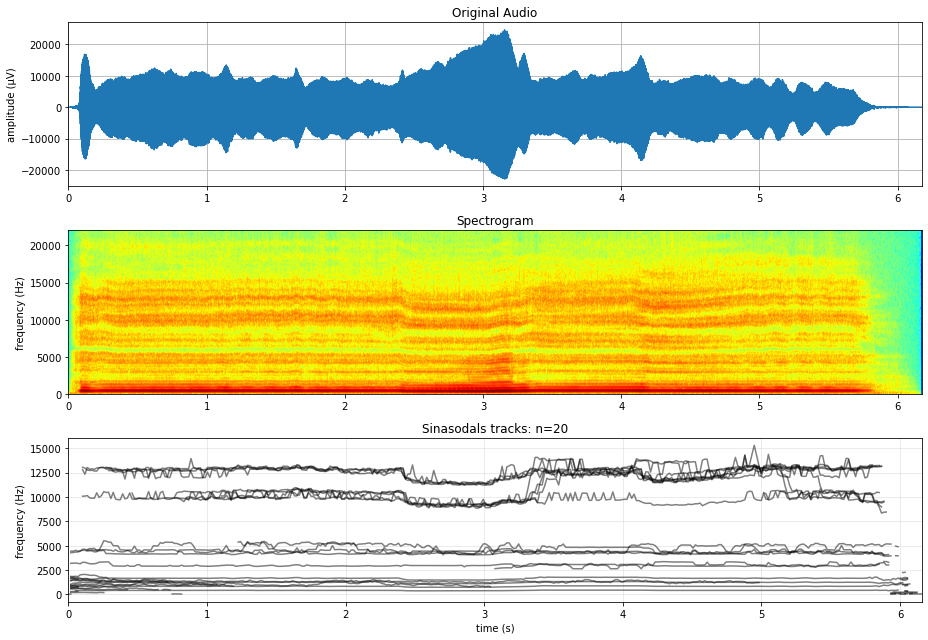

In [20]:
plt.figure(figsize=(13,9))
plt.subplot(311)
plt.plot(t,x)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title('Original Audio')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')


plt.subplot(312)
plt.imshow(mXt.T,aspect='auto',origin='lower',cmap='jet',extent=[t[0],t[-1],0,fs/2])
plt.title('Spectrogram')
#plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')


plt.subplot(313)
tx = t[-1]*np.arange(fXt1.shape[0])/fXt1.shape[0]

plt.plot(tx,fXt1,'-k',alpha=0.5)
#plt.ylim([0,fs/2])
plt.xlim([0,tx[-1]])

plt.title(f'Sinasodals tracks: n={N}')
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Synthesis of Audio from 20 sinasodal tracks

In [22]:
Xr = sp.sineModel_synthesis(fXst, mXst, pXst,fs,overlap=750)
print(Xr.shape)

(273000,)


In [23]:
mXrt,pXrt = sp.stft_analysis(Xr, winlen=441, overlap=220,window='blackmanharris',nfft=None)

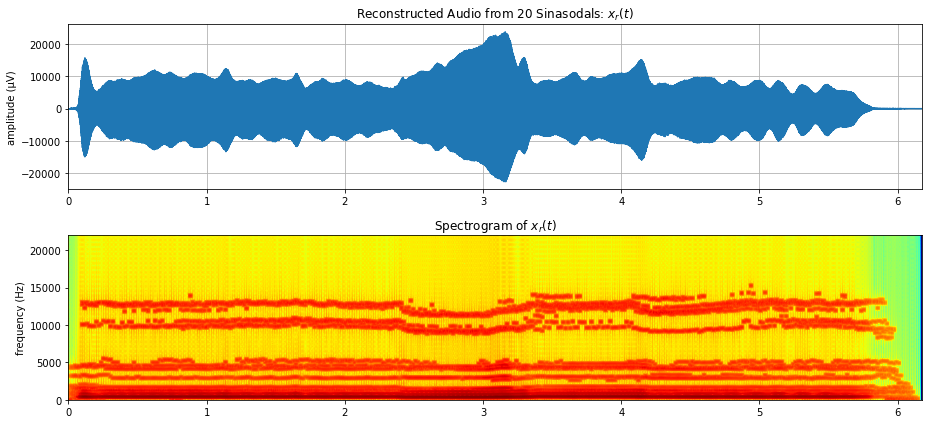

In [25]:
plt.figure(figsize=(13,6))
plt.subplot(211)
plt.plot(t,Xr[:len(x)])
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title(f'Reconstructed Audio from {N} Sinasodals: $x_r(t)$')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')

plt.subplot(212)
plt.imshow(mXrt.T,aspect='auto',origin='lower',cmap='jet',extent=[t[0],t[-1],0,fs/2])
plt.title(r'Spectrogram of $x_r(t)$')
#plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')

plt.tight_layout()
plt.show()

IPython.display.Audio(Xr,rate=fs)

Reconstructed Audio

<audio controls="controls">
      <source src="https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing_female_recons.wav" type="audio/wav">
</audio>

https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing_female_recons.wav

## Residual: Discarded part of Audio - mostly hissing sound

In [28]:
Xd = x - Xr[:len(x)]
Xd.shape

(272243,)

In [29]:
mXdt,pXdt = sp.stft_analysis(Xd, winlen=441, overlap=220,window='blackmanharris',nfft=None)

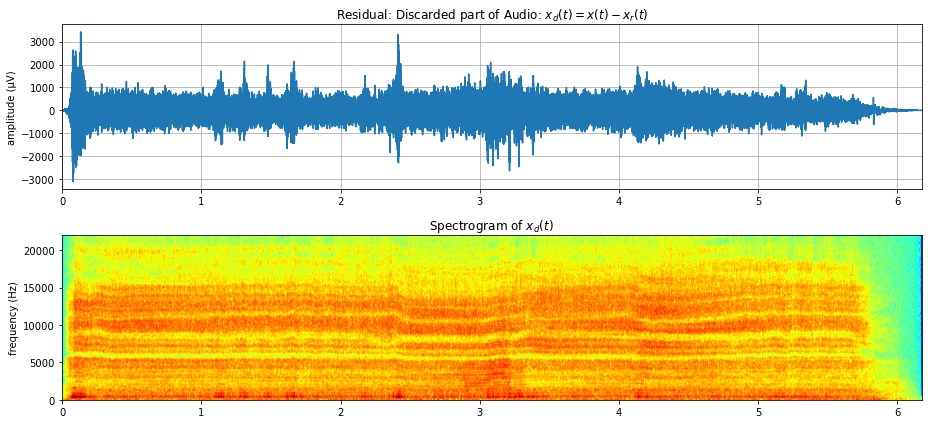

In [30]:
plt.figure(figsize=(13,6))
plt.subplot(211)
plt.plot(t,Xd)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.title(r'Residual: Discarded part of Audio: $x_d(t) = x(t)-x_r(t)$')
#plt.xlabel('time (s)')
plt.ylabel('amplitude (μV)')

plt.subplot(212)
plt.imshow(mXdt.T,aspect='auto',origin='lower',cmap='jet',extent=[t[0],t[-1],0,fs/2])
plt.title(r'Spectrogram of $x_d(t)$')
#plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')

plt.tight_layout()
plt.show()

IPython.display.Audio(Xd,rate=fs)

Residual Audio   
<audio controls="controls">
      <source src="https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing_female_residual.wav" type="audio/wav">
</audio>

https://raw.githubusercontent.com/Nikeshbajaj/spkit/master/spkit/data/singing_female_residual.wav